In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pyplot import figure
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [2]:
def vis_reconstruction_error(dataframe, no_features, first_feature, last_feature):
    fig, axes = plt.subplots(no_features, 1, figsize=(20,10))
    ax = axes.ravel()
    columns = dataframe.columns
    t = dataframe.iloc[:,0]
    for i in range(first_feature, last_feature):
        sns.lineplot(data=dataframe, 
                     x=t, 
                     y=dataframe.iloc[:, i+4],
                     ax=ax[i-first_feature],
                     color="blue",)
        if i == 1:
            ax[i-first_feature].axhline(0.75, color="r", linestyle ="-", linewidth=1)
        else:
            ax[i-first_feature].axhline(10, color="r", linestyle ="-", linewidth=1)

## Predicted Data

In [3]:
artifical_data = pd.read_csv("../../files/prediction/MSE/artifical_2_signals.csv", sep=";")
training_set = artifical_data.iloc[:10000,:]
subset = artifical_data.iloc[10000:,:]

## Reconstruction Error during Training

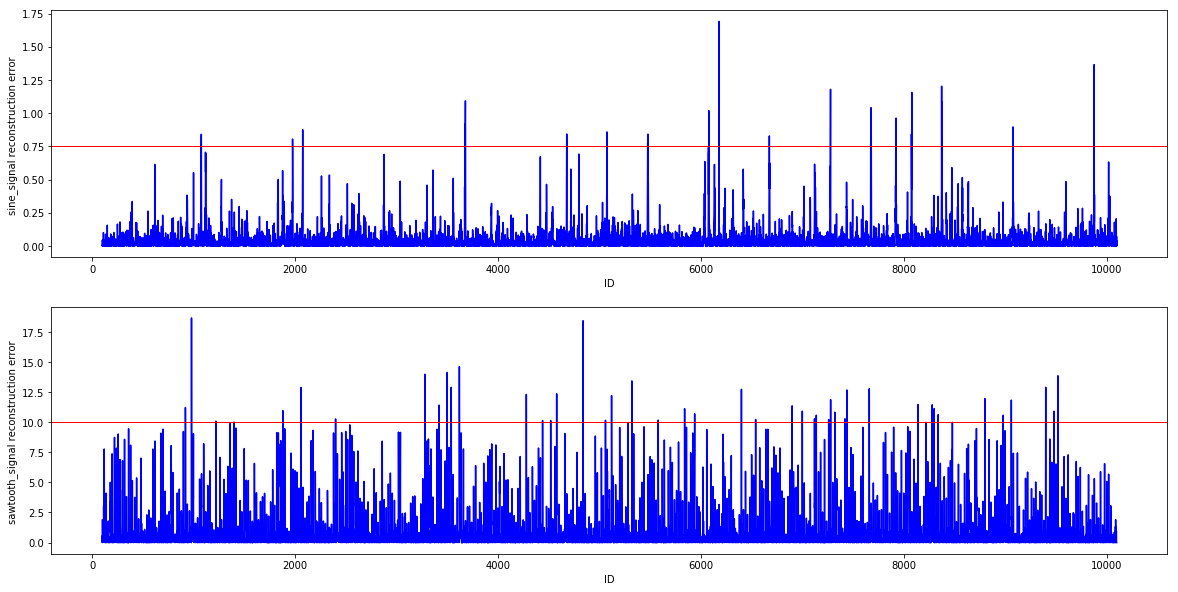

In [4]:
vis_reconstruction_error(training_set, 2, 1, 3)
plt.show()

__Threshold Sine Signal:__ 0.75 <br>
__Threshold Sawtooth Signal:__ 10

# Visualisation of Prediction 

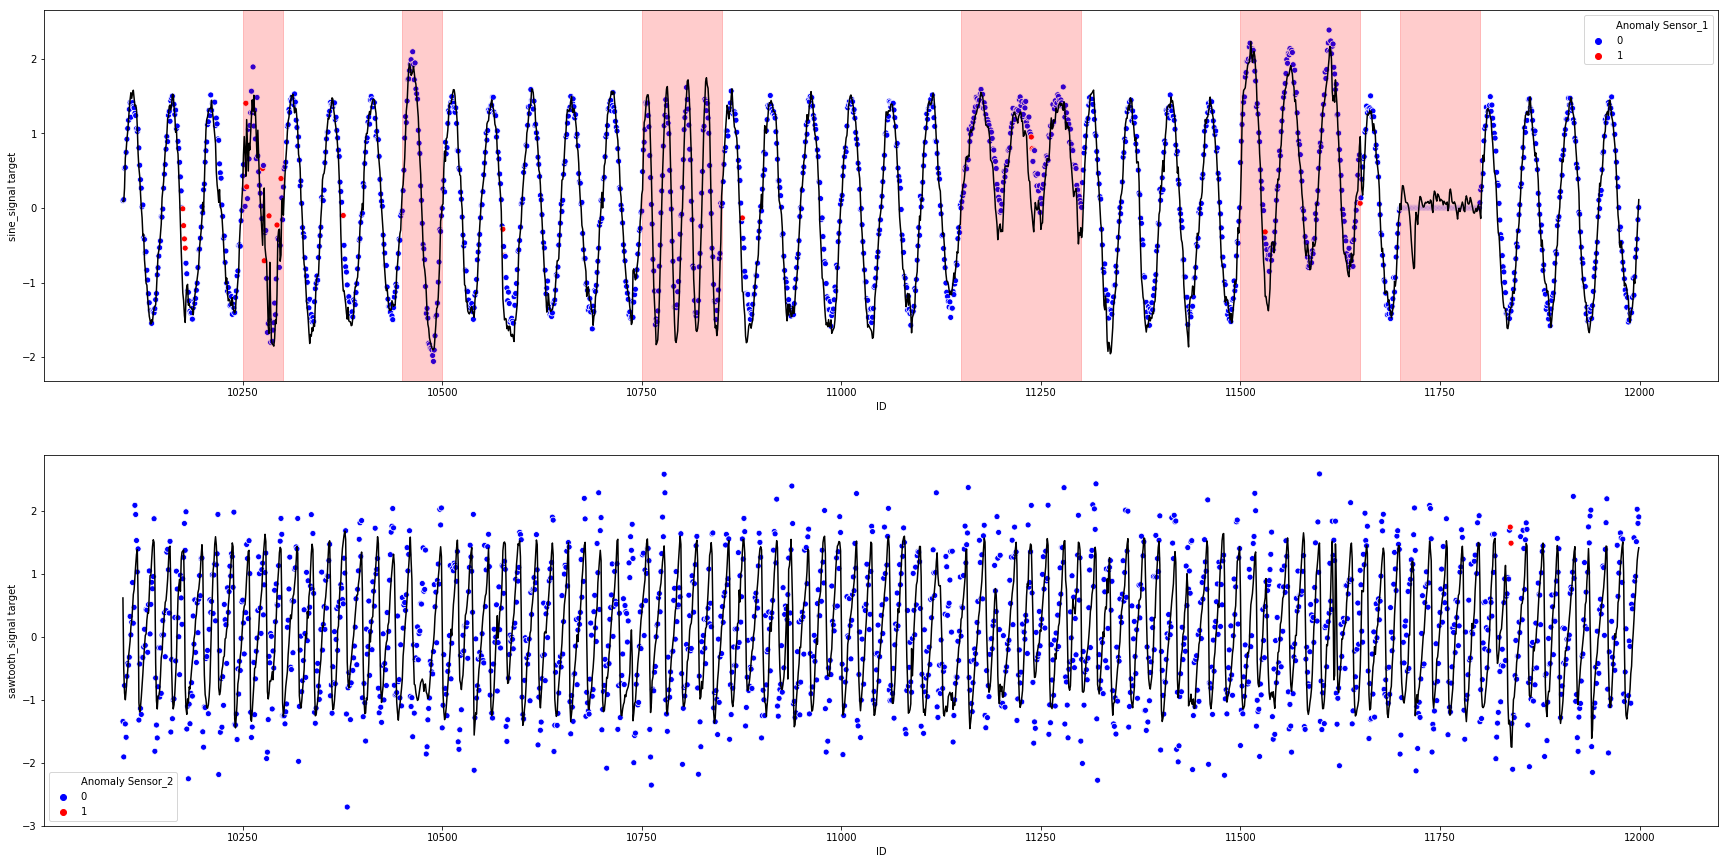

In [5]:
fig, axes = plt.subplots(2, 1, figsize=(30,15))
ax = axes.ravel()
columns = subset.columns
t = subset.iloc[:,0]
for i in range(1,3):
    # Values about appearance of anomaly 
    palette = []
    anomaly_label = subset.iloc[:, i+6].values
    if 0 in anomaly_label and 1 not in anomaly_label:
        palette = ["blue"]
    elif 1 in anomaly_label and 0 not in anomaly_label:
        palette = ["red"]
    elif 0 in anomaly_label and 1 in anomaly_label:
        palette = ["blue","red"]
    
    # Predicted sensor values
    sns.lineplot(data=subset, 
                 x=t, 
                 y=columns[i+2],
                 ax=ax[i-1], 
                 color="black")
    
    # Target sensor values (actual sensor values)
    sns.scatterplot(data=subset, 
                    x=t, 
                    y=columns[i],
                    ax=ax[i-1], 
                    hue=columns[i+6], 
                    palette=palette)
    if i == 1:
        ax[i-1].axvspan(10251,10301, alpha=0.2, color='red')
        ax[i-1].axvspan(10450,10500, alpha=0.2, color='red')
        ax[i-1].axvspan(10750,10850, alpha=0.2, color='red')
        ax[i-1].axvspan(11150,11300, alpha=0.2, color='red')
        ax[i-1].axvspan(11500,11650, alpha=0.2, color='red')
        ax[i-1].axvspan(11700,11800, alpha=0.2, color='red')
    
plt.show()

## Evaluation Metrics
### F1-score
Exact labels are provided, thus F1-score can be computed

In [30]:
anomaly_label_ground_truth = artifical_data.anomaly
anomaly_label_by_model = artifical_data["Anomaly Sensor_1"]
print(f1_score(anomaly_label_ground_truth, anomaly_label_by_model, average='macro'))

0.5031192333760445


### Confusion Matrix

In [34]:
tn, fp, fn, tp = confusion_matrix(anomaly_label_ground_truth, anomaly_label_by_model).ravel()
print("Positive --> Anomaly")
print("Negative --> Normal Behaviour")
print("--"*15)
print("True negative: {}".format(tn))
print("False positive: {}".format(fp))
print("False negative: {}".format(fn))
print("True positive: {}".format(tp))

Positive --> Anomaly
Negative --> Normal Behaviour
------------------------------
True negative: 11256
False positive: 44
False negative: 589
True positive: 11
